In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Notes Below:

### .head and .tail can be saved to a new variable and used for slicing

### columns of a dataframe are called 'series' when you pull them out
you can pull out series by using square brackets like this: **titles['year']**, 
can do operations on the whole series like this: **titles['year'] + 10000**,

can also access series like this: **titles.year**


In [6]:
h = titles.head()
h

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [7]:
# Pull a series
h['title']

0             The Rising Son
1    The Thousand Plane Raid
2     The Spider and the Fly
3                    Country
4                 Gaiking II
Name: title, dtype: object

In [8]:
# Alternate way to pull a series
h.year

0    1990
1    1969
2    1949
3    2000
4    2011
Name: year, dtype: int64

In [9]:
# Filtering data frame
h[h.year > 1985]

,title,year
0,The Rising Son,1990
3,Country,2000
4,Gaiking II,2011


In [12]:
# Multiple conditions, note the parantheses, also works with bitwise or |

h[(h.year > 1985) & (h.year <= 1990)]

,title,year
0,The Rising Son,1990


In [15]:
t = titles
t[t.title == 'Macbeth'].sort_values(by='year')

,title,year
4256,Macbeth,1913
68442,Macbeth,1916
160549,Macbeth,1948
206503,Macbeth,1987
104668,Macbeth,1997
25906,Macbeth,1998
170207,Macbeth,2003
134178,Macbeth,2004
9393,Macbeth,2006
152942,Macbeth,2009


In [16]:
t = titles
t[t.title == 'Macbeth'].sort_values(by='year').head()

,title,year
4256,Macbeth,1913
68442,Macbeth,1916
160549,Macbeth,1948
206503,Macbeth,1987
104668,Macbeth,1997


In [17]:
t = titles
t[t.title == 'Macbeth'].sort_values(by='year').tail()

,title,year
62226,Macbeth,2012
11787,Macbeth,2013
156978,Macbeth,2014
127594,Macbeth,2015
186983,Macbeth,2017


In [22]:
# Filtering not null values

h = cast.head()
hnotnull = h[h.n.notnull()]
hnotnull

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0


In [23]:
# Filtering null values

h = cast.head()
hisnull = h[h.n.isnull()]
hisnull

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


**END NOTES**

### How many movies are listed in the titles dataframe?

In [6]:
len(titles)

234375

### What are the earliest two films listed in the titles dataframe?

In [11]:
titles.sort_values(by='year').head(2)

,title,year
179371,Miss Jerry,1894
217129,The Startled Lover,1898


### How many movies have the title "Hamlet"?

In [14]:
t = titles[titles.title == 'Hamlet']
len(t)

20

### How many movies are titled "North by Northwest"?

In [15]:
t = titles[titles.title == 'North by Northwest']
len(t)

1

### When was the first movie titled "Hamlet" made?

In [18]:
t = titles[titles.title == 'Hamlet']
t.sort_values(by='year')
t.head(1)

,title,year
6080,Hamlet,1948


### List all of the "Treasure Island" movies from earliest to most recent.

In [19]:
t = titles[titles.title == 'Treasure Island']
t.sort_values(by='year')

,title,year
207857,Treasure Island,1918
51790,Treasure Island,1920
209492,Treasure Island,1934
97768,Treasure Island,1950
77911,Treasure Island,1972
112394,Treasure Island,1973
207222,Treasure Island,1985
180979,Treasure Island,1999


### How many movies were made in the year 1950?

In [22]:
t = titles[titles.year == 1950]
len(t)

1108

### How many movies were made in the year 1960?

In [23]:
t = titles[titles.year == 1960]
len(t)

1522

### How many movies were made from 1950 through 1959?

In [25]:
t = titles[(titles.year >= 1950) & (titles.year <= 1959)]
len(t)

12838

### In what years has a movie titled "Batman" been released?

In [29]:
t = titles[titles.title =='Batman']
t

,title,year
56580,Batman,1989
75274,Batman,1943


### How many roles were there in the movie "Inception"?

In [37]:
c = cast[cast.title == 'Inception']
len(c)

78

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [38]:
h = c[c.n.notnull()]
len(h)

51

### But how many roles in the movie "Inception" did receive an "n" value?

In [39]:
s = c[c.n.isnull()]
len(s)

27

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [45]:
c = cast[(cast.title == 'North by Northwest')]
nbn = c[c.n.notnull()]
nbn.sort_values(by='n')

,title,year,name,type,character,n
862704,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
3454870,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
1442245,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
3107584,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
353161,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
3003291,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
1678037,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
1262029,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
2421978,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
1792870,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

In [47]:
s = cast[(cast.title == "Sleuth") & (cast.year == 1972)]
s.sort_values(by='n')

,title,year,name,type,character,n
1688044,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
323425,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
370204,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1450432,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
2691119,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
1433847,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0


### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [48]:
s = cast[(cast.title == "Sleuth") & (cast.year == 2007)]
s.sort_values(by='n')

,title,year,name,type,character,n
323426,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1280164,Sleuth,2007,Jude Law,actor,Milo,2.0
1787459,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
257450,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
370205,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2691118,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
3312638,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


### How many roles were credited in the silent 1921 version of Hamlet?

In [51]:
s = cast[(cast.title == "Hamlet") & (cast.year == 1921)]
len(s)

9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [52]:
s = cast[(cast.title == "Hamlet") & (cast.year == 1996)]
len(s)

54

### How many "Hamlet" roles have been listed in all film credits through history?

In [53]:
s = cast[(cast.title == "Hamlet")]
len(s)

342

### How many people have played an "Ophelia"?

In [57]:
s = cast[(cast.character == "Ophelia")]
len(s)

113

### How many people have played a role called "The Dude"?

In [58]:
s = cast[(cast.character == "The Dude")]
len(s)

18

### How many people have played a role called "The Stranger"?

In [59]:
s = cast[(cast.character == "The Stranger")]
len(s)

213

### How many roles has Sidney Poitier played throughout his career?

In [60]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [62]:
s = cast[cast.name == "Sidney Poitier"]
len(s)

43

### How many roles has Judi Dench played?

In [63]:
s = cast[cast.name == "Judi Dench"]
len(s)

54

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

In [64]:
s = cast[(cast.name == "Cary Grant") & (cast.year >= 1940) & (cast.year <= 1949) & (cast.n > 1)]
s

,title,year,name,type,character,n
862701,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
862711,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### List the leading roles that Cary Grant played in the 1940s in order by year.

In [66]:
s = cast[(cast.name == "Cary Grant") & (cast.year >= 1940) & (cast.year <= 1949) & (cast.n == 1)]
s.sort_values(by='year')

,title,year,name,type,character,n
862726,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
862684,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
862728,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0
862716,Suspicion,1941,Cary Grant,actor,Johnnie,1.0
862730,The Talk of the Town,1942,Cary Grant,actor,Leopold Dilg,1.0
862707,Once Upon a Honeymoon,1942,Cary Grant,actor,Patrick 'Pat' O'Toole,1.0
862675,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
862699,Mr. Lucky,1943,Cary Grant,actor,Joe Adams,1.0
862700,Mr. Lucky,1943,Cary Grant,actor,Joe Bascopolous,1.0
862708,Once Upon a Time,1944,Cary Grant,actor,Jerry Flynn,1.0


### How many roles were available for actors in the 1950s?

In [69]:
s = cast[(cast.type == "actor") & (cast.year >= 1950) & (cast.year <= 1959)]
len(s)

157065

### How many roles were avilable for actresses in the 1950s?

In [70]:
s = cast[(cast.type == "actress") & (cast.year >= 1950) & (cast.year <= 1959)]
len(s)

57089

### How many leading roles (n=1) were available from the beginning of film history through 1980?

In [71]:
s = cast[(cast.n == 1) & (cast.year >= 1894) & (cast.year <= 1980)]
len(s)

64646

### How many non-leading roles were available through from the beginning of film history through 1980?

In [72]:
s = cast[(cast.n > 1) & (cast.year >= 1894) & (cast.year <= 1980)]
len(s)

663825

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?

In [80]:
s = cast[(cast.year >= 1894) & (cast.year <= 1980)]
s_null = s[s.n.isnull()]
len(s_null)

444236

### NOTES

http://pandas-docs.github.io/pandas-docs-travis/

In [87]:
h = titles
# Can use string methods like contains, endswith, startswith etc
hthe = h[h.title.str.startswith("The")]
hthe.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
6,The Fresh Air Will Do You Good,2008
12,The Abductress,2014


In [90]:
# Count values
titles.year.value_counts().head()

2017    10083
2016     9447
2015     8564
2014     8165
2013     7787
Name: year, dtype: int64

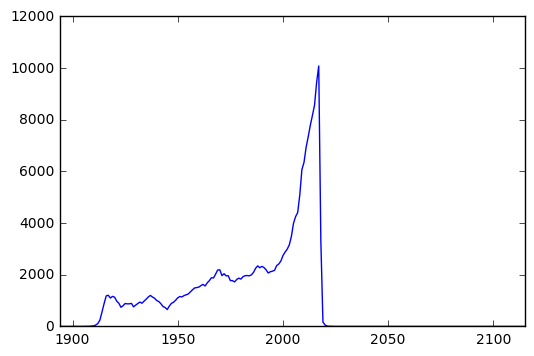

In [94]:
# Plot value counts
titles.year.value_counts().sort_index().plot()

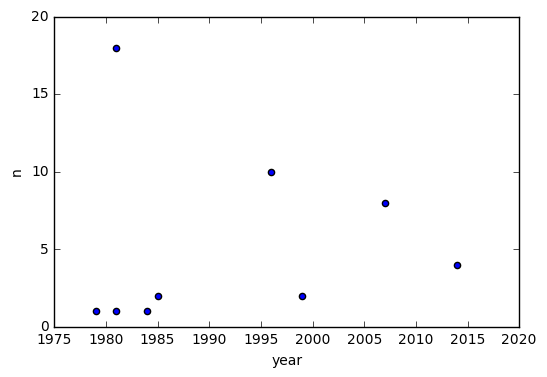

In [98]:
c = cast
c = c[c.character == 'Kermit the Frog']
c.plot(x='year', y='n', kind='scatter')

In [100]:
# Only looking at certain columns
c.head()[['year', 'n']]

,year,n
972816,1981,18.0
972817,1985,2.0
972822,1981,1.0
972830,1979,1.0
972837,1984,1.0
